# simple linear regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

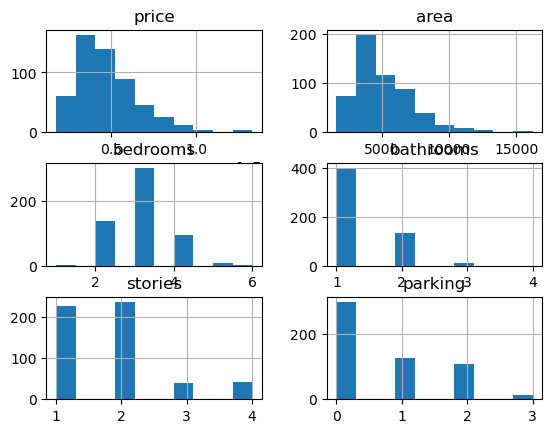

In [13]:
data.hist()

In [14]:
data.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
x=data.iloc[:, 1:2] 
x.head(5)

,area
0,7420
1,8960
2,9960
3,7500
4,7420


In [16]:
y=data.iloc[:,:1]
y.head(5)

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


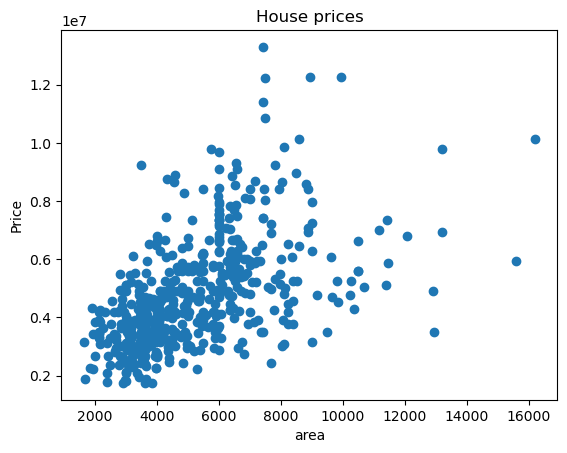

In [17]:
plt.scatter(x,y)
plt.title('House prices')
plt.xlabel('area')
plt.ylabel('Price')
plt.show()

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
data.shape

(545, 13)

In [20]:
xtrain.shape

(436, 1)

In [21]:
ytest.shape

(109, 1)

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started.......\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed.....')
print()
print('Testing invoked......\n')
ypred=lin_reg.predict(xtest)
print('Predicted Total Payment \n', ypred)
print('\n Testing is also completed....\n')

Training Started.......



Training Completed.....

Testing invoked......

Predicted Total Payment 
 [[5024060.33139816]
 [5279498.23656143]
 [4232202.82539203]
 [4640903.47365326]
 [4198144.43803692]
 [5373158.80178796]
 [6139472.51727777]
 [4636646.17523387]
 [3891618.951841  ]
 [3661724.83719406]
 [6165016.3077941 ]
 [4187075.46214652]
 [4095969.27597162]
 [3832016.77396957]
 [4202401.73645631]
 [4057653.59019713]
 [3363713.94783691]
 [5066633.31559204]
 [5002773.83930122]
 [5066633.31559204]
 [4649418.07049203]
 [5417860.43519154]
 [4065742.45719396]
 [4130027.66332672]
 [6024525.4599543 ]
 [6752523.48966962]
 [3827759.47555018]
 [3789443.78977569]
 [8131888.17755128]
 [3789443.78977569]
 [4215173.63171447]
 [3840531.37080835]
 [5066633.31559204]
 [5328457.16838439]
 [4545114.25921703]
 [4470611.53687774]
 [4490195.10960693]
 [3866075.16132467]
 [3993794.11390631]
 [3698763.33344273]
 [5909578.40263083]
 [4057653.59019713]
 [5245439.84920633]
 [4300319.60010223]
 [5385930.69704613]

In [23]:
ytest

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [24]:
diff=ytest-ypred
diff

,price
316,-9.640603e+05
77,1.370502e+06
360,-5.222028e+05
90,1.799097e+06
493,-1.398144e+06
...,...
15,4.033367e+06
357,-1.689562e+06
39,2.843367e+06
54,2.283367e+06


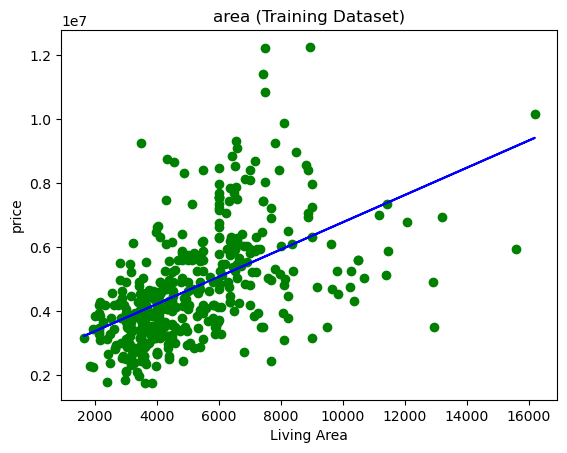

In [25]:
#Visualize the training dataset
plt.scatter(xtrain, ytrain, color='green')
plt.plot(xtrain, lin_reg.predict(xtrain), color='blue')
plt.title('area (Training Dataset)')
plt.xlabel('Living Area')
plt.ylabel('price')
plt.show()

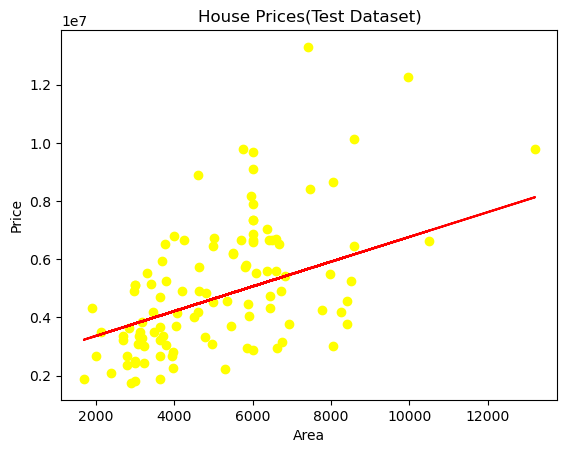

In [26]:
#Visualize the test dataset
plt.scatter (xtest, ytest, color='yellow')
plt.plot(xtest, lin_reg.predict(xtest), color='red')
plt.title('House Prices(Test Dataset)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))
print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 3675286604768.185

RMSE: 	 1917103.7021424233

Variance Score:	 0.29172935980933723

R-Square: 	 0.27287851871974644


In [50]:
xm=data.iloc[:,1:4]
xm.head(5)

,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [52]:
ym=data.iloc[:, :1]
ym.head(5)

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [30]:
import sklearn
from sklearn.model_selection import train_test_split
xmtrain, xmtest, ymtrain, ymtest=train_test_split(xm,ym, test_size=0.2, random_state=42)

In [31]:
xmtrain.shape

(436, 3)

In [32]:
xmtest.shape

(109, 3)

In [33]:
ymtest.shape

(109, 1)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started.......\n')
print()
lin_reg.fit(xmtrain,ymtrain)
print()
print('Training Completed.....')
print()
print('Testing invoked......\n')
ympred=lin_reg.predict(xmtest)
print('Predicted Total Payment \n', ympred)
print('\n Testing is also completed....\n')

Training Started.......



Training Completed.....

Testing invoked......

Predicted Total Payment 
 [[ 5900.        ]
 [ 6500.        ]
 [ 4040.        ]
 [ 5000.        ]
 [ 3960.        ]
 [ 6720.        ]
 [ 8520.        ]
 [ 4990.        ]
 [ 3240.        ]
 [ 2700.        ]
 [ 8580.        ]
 [ 3934.        ]
 [ 3720.        ]
 [ 3100.        ]
 [ 3970.        ]
 [ 3630.        ]
 [ 2000.        ]
 [ 6000.        ]
 [ 5850.        ]
 [ 6000.        ]
 [ 5020.        ]
 [ 6825.        ]
 [ 3649.        ]
 [ 3800.        ]
 [ 8250.        ]
 [ 9960.00000001]
 [ 3090.        ]
 [ 3000.        ]
 [13200.        ]
 [ 3000.        ]
 [ 4000.        ]
 [ 3120.        ]
 [ 6000.        ]
 [ 6615.        ]
 [ 4775.        ]
 [ 4600.        ]
 [ 4646.        ]
 [ 3180.        ]
 [ 3480.        ]
 [ 2787.        ]
 [ 7980.        ]
 [ 3630.        ]
 [ 6420.        ]
 [ 4200.        ]
 [ 6750.        ]
 [ 5885.        ]
 [ 6000.        ]
 [ 4640.        ]
 [ 8050.        ]
 [ 3000.        ]

In [35]:
diff2=ymtest-ympred
diff2

,area
316,5.456968e-10
77,-1.644366e-09
360,8.435563e-10
90,-1.464286e-09
493,1.612534e-09
...,...
15,-3.713467e-09
357,7.876224e-10
39,-2.707566e-09
54,-2.234628e-09


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ymtest, ympred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ymtest, ympred)))
print()
print('Variance Score:\t', explained_variance_score (ymtest,ympred))
print()
print('R-Square: \t', r2_score (ymtest, ympred))

Mean Squared Error: 	 3.679888829002579e-18

RMSE: 	 1.918303633162013e-09

Variance Score:	 1.0

R-Square: 	 1.0


# Implement Multiple linear Regression

In [37]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

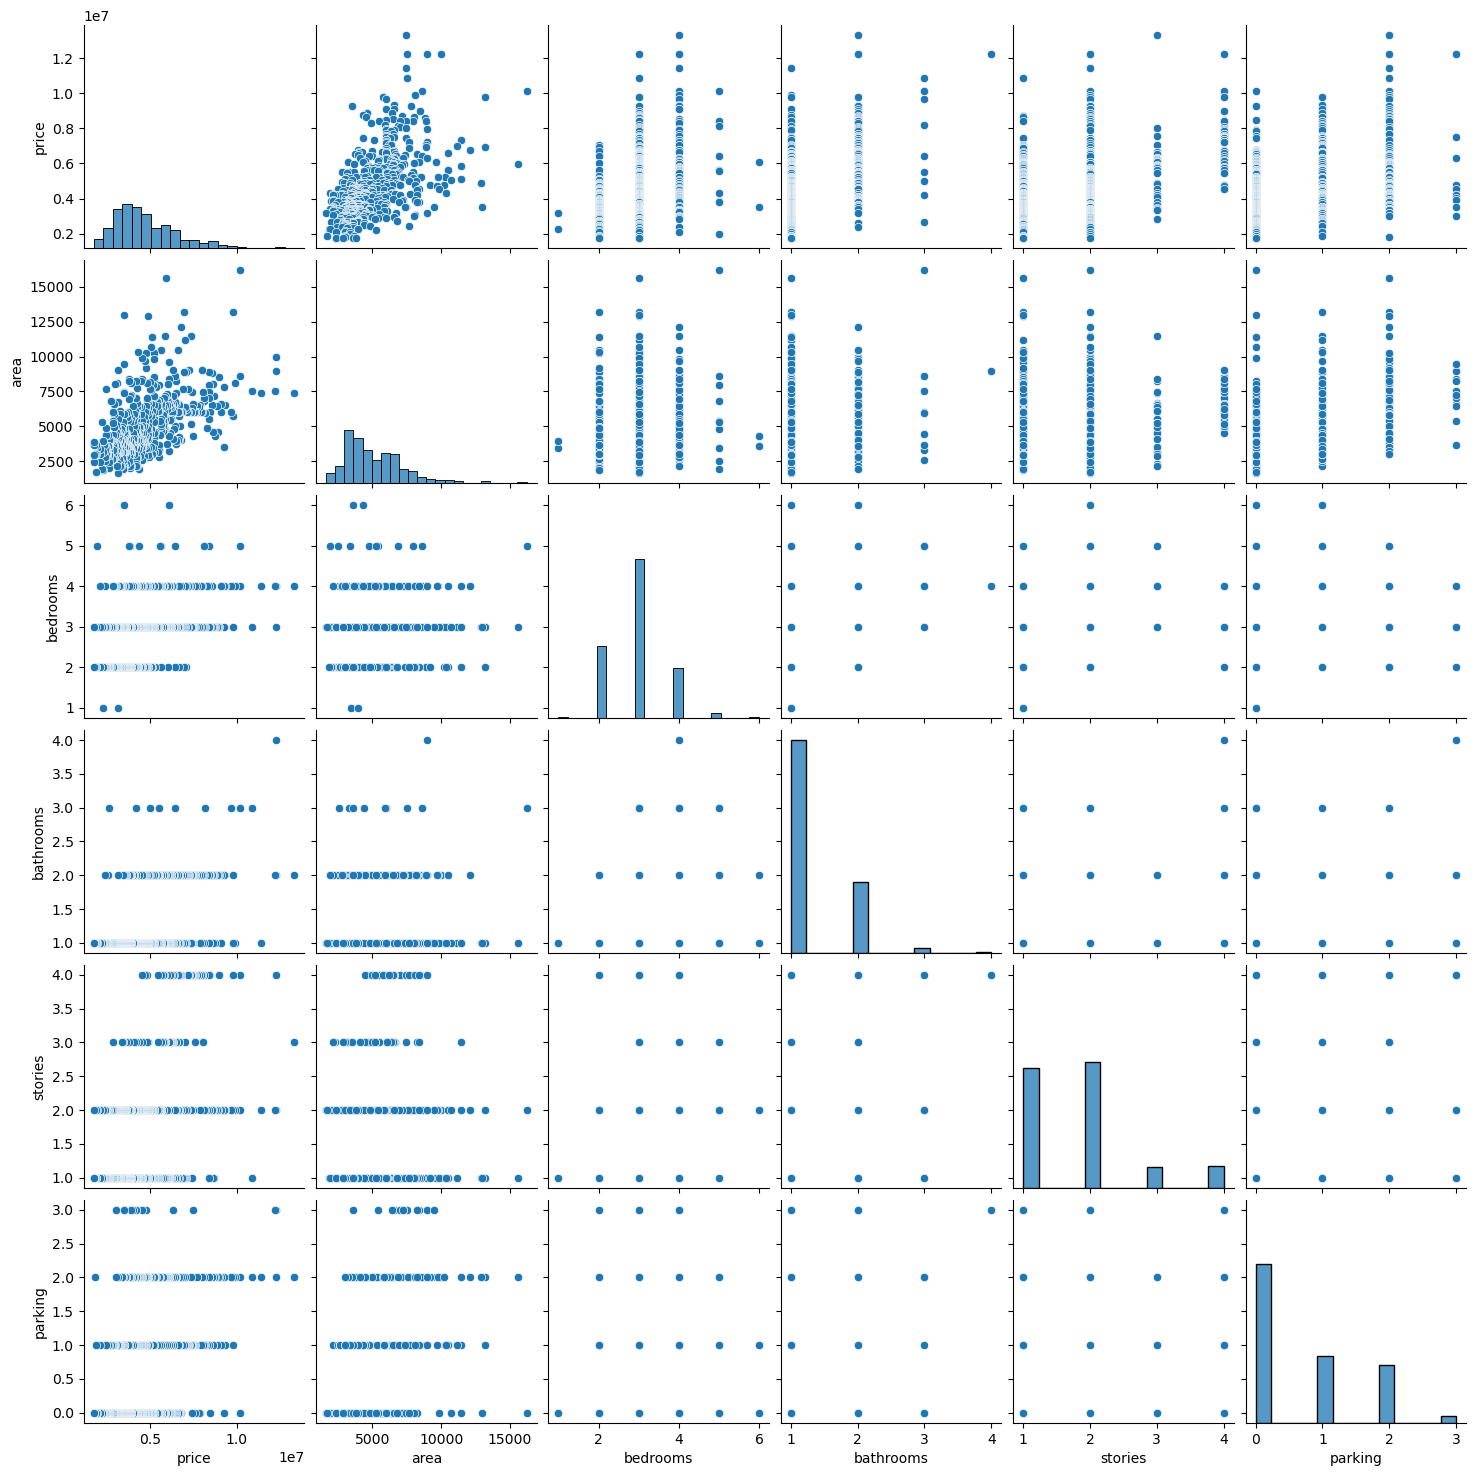

In [39]:
sns.pairplot(df)

In [40]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
x=df.iloc[:,2:5]
x.head()

,bedrooms,bathrooms,stories
0,4,2,3
1,4,4,4
2,3,2,2
3,4,2,2
4,4,1,2


In [44]:
y=df.iloc[:,:1]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [54]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()
#train the model
mul_reg.fit(xtrain,ytrain)
print("Training completed")
print()
#test the model
ypred=mul_reg.predict(xtest)
print("Testing completed")

Training completed

Testing completed


In [55]:
from sklearn.metrics import mean_squared_error,r2_score
print()
print('Mean Squared Error ; \t',mean_squared_error(ytest,ypred))
print()
print('RMSE: ', np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-square: ',r2_score(ytest,ypred))
print()


Mean Squared Error ; 	 3069209207501.8164

RMSE:  1751915.8677007912

R-square:  0.2690959015079952

